<a href="https://colab.research.google.com/github/SharlyneAyako/ASSIGNMENTS/blob/main/Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping ,ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers



In [34]:
# importing dataset
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train.shape

(60000, 28, 28)

Text(0.5, 1.0, 'Label: 7')

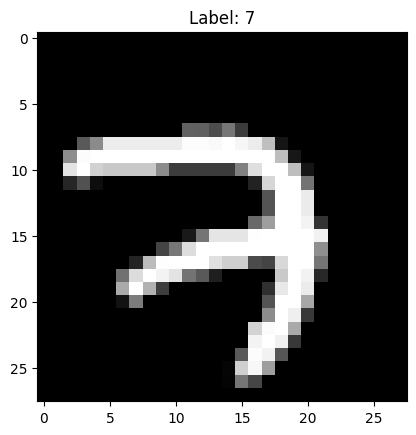

In [35]:
# visualizaton
plt.imshow(x_train[5000] ,cmap="grey")
plt.title(f"Label: {y_train[5000]}")

In [36]:
model = Sequential([
    Flatten(input_shape =(28, 28)),
    Dense(200,activation ="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(184,activation ="relu",kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(168,activation ="relu",kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.25),
    Dense(100,activation ="relu",kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(48,activation ="relu",kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(10,activation ="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [38]:
#setting callbacks
callbacks =[
    EarlyStopping(monitor="Val_loss" , patience=5),
    ModelCheckpoint("Best.h5", save_best_only =True)
]

In [39]:
# Evaluating the model
loss,accuracy = model.evaluate(x_test,y_test)
print("Accuracy:", accuracy)
print("Loss:" ,loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0846 - loss: 84.9898
Accuracy: 0.08219999819993973
Loss: 87.73619842529297
